In [158]:
"""
Functionality I want:
    Give current holding information      x
    Get current portfolio value           x
    Give total returns on asset           x
    Give returns since given buy / sell   x
    Automate trading212 activity download
    Calculate current portfolio returns
"""

'\nFunctionality I want:\n    Give current holding information\n    Give total returns on asset\n    Give returns since given buy / sell\n'

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as wb
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
history = pd.read_csv('../data/historical.csv')

In [3]:
history.keys()

Index(['Action', 'Time', 'ISIN', 'Ticker', 'Name', 'No. of shares',
       'Price / share', 'Currency (Price / share)', 'Exchange rate',
       'Result (GBP)', 'Total (GBP)', 'Withholding tax',
       'Currency (Withholding tax)', 'Charge amount (GBP)', 'Stamp duty (GBP)',
       'Stamp duty reserve tax (GBP)', 'Notes', 'ID'],
      dtype='object')

In [4]:
np.unique(history['Action'].values)

array(['Deposit', 'Dividend (Ordinary)', 'Limit buy', 'Market buy',
       'Market sell'], dtype=object)

In [5]:
tickers = np.unique(np.asarray(history['Ticker'].values).astype(str))
tickers = [ticker for ticker in tickers if 'nan' not in ticker]

In [6]:
wb_tickers = np.asarray(['GOOG','IUSA.UK','BARC.UK','GME','ECAR.UK','CNX1.UK','JDW.UK',
                      'VUKE.UK','VAPX.UK','V.US','BB.US','MA.US','NAKD.US','NOK.US',
                      'INRG.UK'])

In [7]:
ticker_map={'GOOG' : 'GOOGL',
            'IUSA.UK' : 'IUSA',
            'BARC.UK' : 'BARC',
            'GME' : 'GME',
            'ECAR.UK': 'ECAR', 
            'CNX1.UK': 'CNX1',
            'JDW.UK' : 'JDW',
            'VUKE.UK':'VUKE',
            'VAPX.UK':'VAPX',
            'V.US':'V',
            'BB.US':'BB',
            'MA.US':'MA',
            'NAKD.US':'NAKD',
            'NOK.US':'NOK',
            'INRG.UK':'INRG'}

In [8]:
history.head(10)

,Action,Time,ISIN,Ticker,Name,No. of shares,Price / share,Currency (Price / share),Exchange rate,Result (GBP),Total (GBP),Withholding tax,Currency (Withholding tax),Charge amount (GBP),Stamp duty (GBP),Stamp duty reserve tax (GBP),Notes,ID
0,Deposit,2020-06-15 13:31:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,500.0,NaN,NaN,Transaction ID: 1825922278690091,8b48092e-e32d-4467-80c8-2802513c8fdf
1,Market buy,2020-06-15 13:33:44,IE0031442068,IUSA,iShares Core S&P 500 GBX,5.302789,2357.25,GBX,100.00000,NaN,125.0,NaN,NaN,NaN,NaN,NaN,NaN,EOF263714287
2,Market buy,2020-06-15 13:34:20,IE00B1XNHC34,INRG,iShares Global Clean Energy,23.062731,542.00,GBX,100.00000,NaN,125.0,NaN,NaN,NaN,NaN,NaN,NaN,EOF263723875
3,Market buy,2020-06-15 13:34:59,IE00B810Q511,VUKE,Vanguard FTSE 100 GBP,4.745634,26.34,GBP,1.00000,NaN,125.0,NaN,NaN,NaN,NaN,NaN,NaN,EOF263733368
4,Market buy,2020-06-15 13:35:43,IE00B9F5YL18,VAPX,Vanguard FTSE Developed Asia Pacific ex Japan,7.150007,17.48,GBP,1.00000,NaN,125.0,NaN,NaN,NaN,NaN,NaN,NaN,EOF263744135
5,Deposit,2020-09-03 10:55:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,500.0,NaN,NaN,Transaction ID: 1645991305229700,294e7bf2-708f-4245-8aa9-45bd04f416ed
6,Market buy,2020-09-03 10:57:16,IE0031442068,IUSA,iShares Core S&P 500 GBX,2.327097,2685.75,GBX,100.00000,NaN,62.5,NaN,NaN,NaN,NaN,NaN,NaN,EOF408571558
7,Market buy,2020-09-03 10:57:33,IE00B1XNHC34,INRG,iShares Global Clean Energy,8.341675,749.25,GBX,100.00000,NaN,62.5,NaN,NaN,NaN,NaN,NaN,NaN,EOF408571906
8,Market buy,2020-09-03 10:57:46,IE00B810Q511,VUKE,Vanguard FTSE 100 GBP,2.347858,26.62,GBP,1.00000,NaN,62.5,NaN,NaN,NaN,NaN,NaN,NaN,EOF408572175
9,Market buy,2020-09-03 10:58:37,IE00B9F5YL18,VAPX,Vanguard FTSE Developed Asia Pacific ex Japan,3.323582,18.81,GBP,1.00000,NaN,62.5,NaN,NaN,NaN,NaN,NaN,NaN,EOF408573529


In [9]:
if type(history['Time'].iloc[0])==str:
    history['Time'] = [dt.datetime.strptime(time, '%Y-%m-%d %H:%M:%S') for time in history['Time']]

In [11]:
# now get historic price data
QUANDL_API_KEY='suGdyfH4RSYbTE5ExozP'
AV_API_KEY='K0U7WUJYXD4OY0TM'

start = dt.datetime(2019, 3, 1)
end = dt.datetime(2021, 3, 18)

web_df = wb.DataReader(wb_tickers, 'stooq', start, end, api_key=QUANDL_API_KEY)

In [12]:
web_df.head(10)

Attributes    Close                                                      \
Symbols        GOOG  IUSA.UK BARC.UK     GME  ECAR.UK  CNX1.UK   JDW.UK   
Date                                                                      
2019-03-01  1140.99  2107.88  153.44  11.364  5.10500  30060.5  1317.04   
2019-03-04  1147.80  2116.63  154.61  11.190  5.09150  30253.0  1306.13   
2019-03-05  1162.03  2121.87  155.38  11.219  5.08350  30440.5  1313.07   
2019-03-06  1157.86  2111.63  156.10  11.181  5.05400  30297.0  1288.28   
2019-03-07  1143.30  2097.63  153.23  11.210  4.93950  30082.5  1262.49   
2019-03-08  1142.32  2092.38  149.93  10.610  4.88375  29956.5  1268.44   
2019-03-11  1175.76  2113.38  152.03  10.891  4.93000  30436.5  1258.53   
2019-03-12  1193.20  2133.37  153.78  11.094  4.96100  30809.5  1265.47   
2019-03-13  1193.32  2126.50  154.76  11.200  4.94625  30737.0  1289.27   
2019-03-14  1185.55  2106.50  155.79  10.950  4.87525  30542.5  1281.33   

Attributes                          ...  Volume                                \
Symbols    VUKE.UK VAPX.UK    V.US  ... CNX1.UK     JDW.UK   VUKE.UK  VAPX.UK   
Date                                ...                                         
2019-03-01  29.204  17.718  147.63  ...  2749.0   101515.0  164657.0  11297.0   
2019-03-04  29.326  17.752  146.14  ...  2277.0   109187.0  209485.0  13044.0   
2019-03-05  29.509  17.826  146.13  ...  1149.0   380436.0  286506.0   8674.0   
2019-03-06  29.559  17.816  145.99  ...  1467.0   219173.0  264114.0  14433.0   
2019-03-07  29.451  17.736  145.03  ...  1119.0   174853.0  542617.0   7773.0   
2019-03-08  29.238  17.582  145.54  ...  1651.0   111857.0  201322.0  15054.0   
2019-03-11  29.338  17.686  148.82  ...  1127.0   107717.0  363545.0  11580.0   
2019-03-12  29.446  17.787  149.87  ...  6882.0   299558.0  509454.0  28657.0   
2019-03-13  29.462  17.574  150.61  ...   505.0   255100.0  252426.0   2940.0   
2019-03-14  29.594  17.434  152.30  ...   884.0  1021650.0  629945.0   2743.0   

Attributes                                                                   
Symbols          V.US       BB.US      MA.US  NAKD.US      NOK.US   INRG.UK  
Date                                                                         
2019-03-01  7104044.0   3245355.0  3033310.0   2458.0  25613208.0  116197.0  
2019-03-04  7066342.0   2786940.0  3009018.0   2260.0  27388014.0   13724.0  
2019-03-05  9798947.0   1520179.0  2808322.0   2096.0  19420540.0    9593.0  
2019-03-06  8288037.0  10410172.0  2879272.0   1785.0  21799680.0   25851.0  
2019-03-07  8870440.0   8034168.0  3920742.0   2107.0  18164498.0   62902.0  
2019-03-08  5232253.0   6375365.0  2720157.0   2237.0  29644314.0   24958.0  
2019-03-11  9477733.0   3562287.0  2698285.0  16315.0  27212345.0   11709.0  
2019-03-12  9582894.0   4094266.0  2504976.0   9767.0  21689192.0    5146.0  
2019-03-13  8412051.0   4027669.0  2718665.0  23499.0  17451966.0   21420.0  
2019-03-14  9481155.0   3283866.0  2868594.0   4259.0  19217047.0    2566.0  

[10 rows x 75 columns]

In [13]:
def plot_historic_data(ticker):
    data = web_df['Close',ticker]
    plt.plot(data.keys(),data.values)
    plt.title(ticker)
    plt.show()

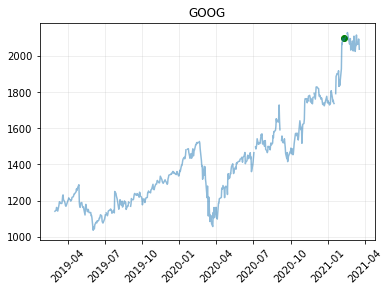

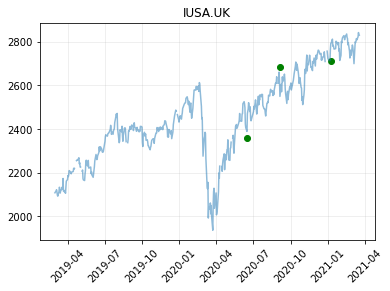

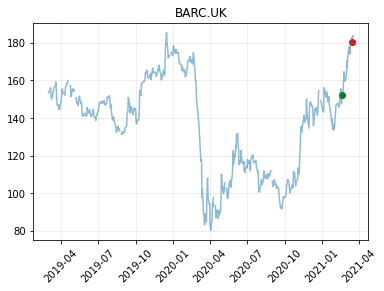

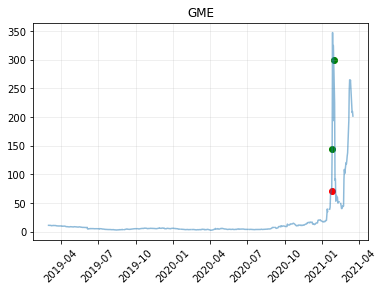

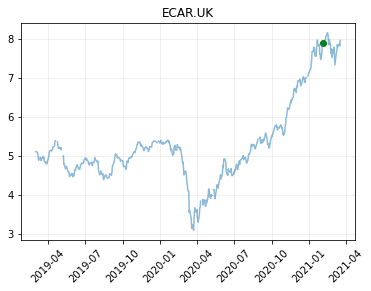

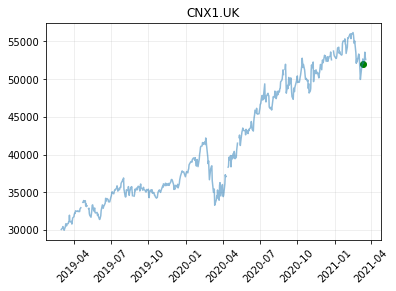

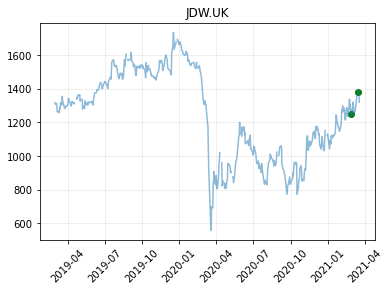

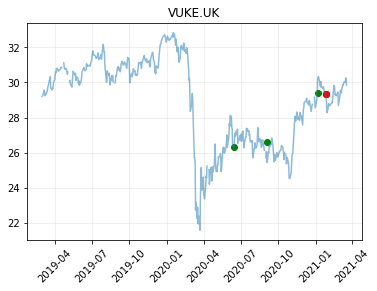

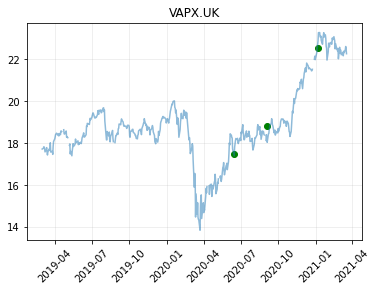

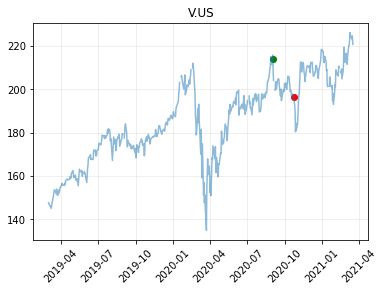

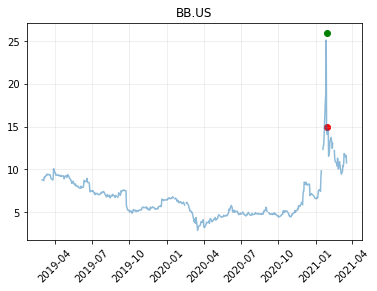

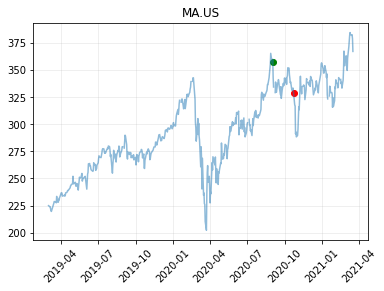

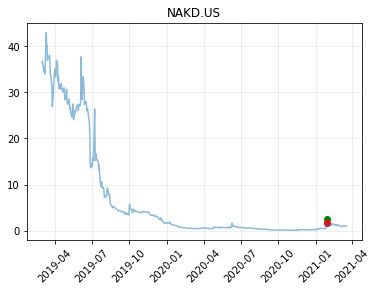

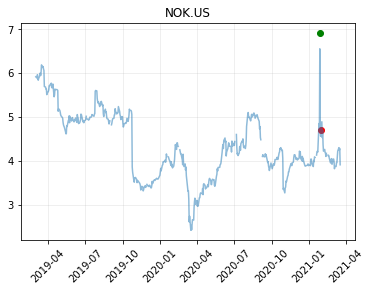

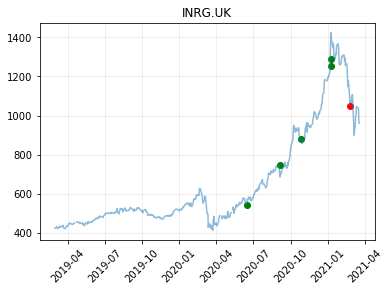

In [15]:
for ticker in wb_tickers:
    data = web_df['Close',ticker]
    plt.plot(data.keys(),data.values,alpha=0.5)

    mask = (((history['Action']=='Market buy') | (history['Action']=='Limit buy')) & 
            (history['Ticker']==ticker_map[ticker]))
    times = history[mask]['Time'].values
    prices = history[mask]['Price / share'].values
    plt.scatter(times,prices,c='green')

    mask = (((history['Action']=='Market sell') | (history['Action']=='Limit sell')) &
            (history['Ticker']==ticker_map[ticker]))
    times = history[mask]['Time'].values
    prices = history[mask]['Price / share'].values
    plt.scatter(times,prices,c='red')

    plt.title(ticker)
    plt.xticks(rotation=45)
    plt.grid(alpha=0.25)
    plt.show()

In [16]:
buys = history[(history['Action']=='Market buy') | (history['Action']=='Limit buy')]
sells = history[(history['Action']=='Market sell') | (history['Action']=='Limit sell')]
buysells = history[((history['Action']=='Market buy') | (history['Action']=='Limit buy') |
                     (history['Action']=='Market sell') | (history['Action']=='Limit sell'))]

In [17]:
def get_history_ticker(wb_ticker):
    return ticker_map[wb_ticker]
    
def get_quandl_ticker(history_ticker):
    return [ticker for ticker in ticker_map.keys() if ticker_map[ticker]==history_ticker][0]

In [18]:
def get_nearest_candle(history_ticker,action_time):
    wb_ticker = get_quandl_ticker(history_ticker)
    data = web_df['Close',wb_ticker]
    dates = web_df['Close'][wb_ticker].keys()
    dates = dates[~np.isnan(data.values)]
    idx = (np.abs(dates-action_time).total_seconds()).argmin()
    return [data[idx], web_df['Close'][wb_ticker].iloc[idx]]

In [19]:
def get_asset_current(history_ticker):
    asset_buys = buys[buys['Ticker']==history_ticker]
    asset_sells = sells[sells['Ticker']==history_ticker]
    asset_total = np.sum(asset_buys['No. of shares']) - np.sum(asset_sells['No. of shares'])
    current_price = get_nearest_candle(history_ticker,dt.datetime.now())[1]
    asset_value = asset_total*current_price
    currency = buys[buys['Ticker']==history_ticker]['Currency (Price / share)'].values[0]
    asset = {'Ticker':history_ticker,
             'Holding':asset_total,
             'Value':asset_value,
             'Price':current_price,
             'Currency':currency}
    return asset

In [20]:
# dictionary of current exchange rates
forex = {
        'GBP':1,
        'USD':float(wb.DataReader('USD/GBP','av-forex',api_key=AV_API_KEY).loc['Exchange Rate'].iloc[0]),
        'GBX':0.01
        }

In [21]:
def get_portfolio_value():
    total_value = 0
    for ticker in ticker_map.values():
        asset = get_asset_current(ticker)
        total_value += asset['Value']*forex[asset['Currency']]
    return total_value

get_portfolio_value()

1708.1967595180452

In [22]:
def get_asset_returns_since_buy(history_ticker,ibuy=0):
    asset = get_asset_current(history_ticker)
    asset_buys = buys[buys['Ticker']==history_ticker]
    asset_sells = sells[sells['Ticker']==history_ticker]
    init_buy_price = asset_buys['Price / share'].iloc[ibuy]*forex[asset['Currency']]
    init_buy_volume = asset_buys['No. of shares'].iloc[ibuy]
    init_buy_date = asset_buys['Time'].iloc[ibuy]
    total_volume = init_buy_volume
    
    returns = -init_buy_price*init_buy_volume
    if len(asset_sells)>0:
        for i in range(len(asset_sells)):
            # only want to use sales after the initial buy date
            if asset_sells.iloc[i]['Time'] > init_buy_date:
                while total_volume>0:
                    sell_price = asset_sells.iloc[i]['Price / share']*forex[asset['Currency']]
                    sell_volume = asset_sells.iloc[i]['No. of shares']
                    
                    if total_volume>=sell_volume:
                        returns += sell_volume*sell_price
                        total_volume -= sell_volume
                    else:
                        # only want to use the amount we have left from initial buy to calc this
                        sell_volume = total_volume
                        returns += sell_volume*sell_price
                        total_volume -= sell_volume
                        
    # if still some left over, calc profit on remaining assets based on current value.
    if total_volume>0:
        returns += total_volume*get_asset_current(history_ticker)['Price']*forex[asset['Currency']]
    return returns

def get_asset_returns_total(history_ticker):
    asset = get_asset_current(history_ticker)
    asset_buysells = buysells[buysells['Ticker']==history_ticker]
    
    init_buy_price = asset_buysells['Price / share'].iloc[0]*forex[asset['Currency']]
    init_buy_volume = asset_buysells['No. of shares'].iloc[0]
    init_buy_date = asset_buysells['Time'].iloc[0]
    total_volume = init_buy_volume
    
    returns = -init_buy_price*init_buy_volume
    for i in range(1,len(asset_buysells)):
        if 'buy' in asset_buysells['Action'].iloc[i]:
            buy_price = asset_buysells.iloc[i]['Price / share']*forex[asset['Currency']]
            buy_volume = asset_buysells.iloc[i]['No. of shares']
            returns -= buy_volume*buy_price
            total_volume += buy_volume

        elif 'sell' in asset_buysells['Action'].iloc[i]:
            sell_price = asset_buysells.iloc[i]['Price / share']*forex[asset['Currency']]
            sell_volume = asset_buysells.iloc[i]['No. of shares']
            if total_volume>=sell_volume:
                returns += sell_volume*sell_price
                total_volume -= sell_volume
            else:
                # only want to use the amount we have left from initial buy to calc this
                sell_volume = total_volume
                returns += sell_volume*sell_price
                total_volume -= sell_volume
                        
    # if still some left over, calc profit on remaining assets based on current value.
    if total_volume>0:
        returns += total_volume*get_asset_current(history_ticker)['Price']*forex[asset['Currency']]
    return returns

0 GOOGL -4.667576596769948
TOTAL:  GOOGL -4.667576596769948


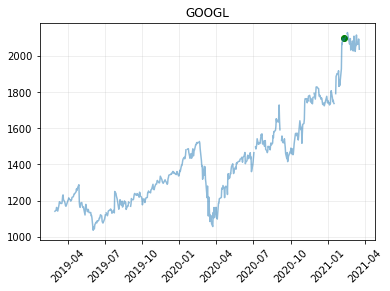

0 IUSA 23.458213988924996
1 IUSA 2.6499813785125
2 IUSA 5.22384444861251
TOTAL:  IUSA 31.332039816049985


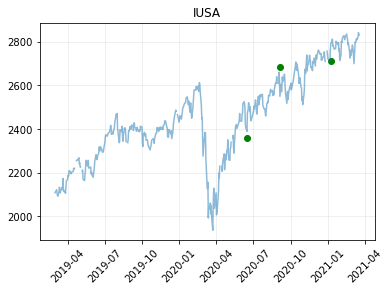

0 BARC 18.450100000719992
TOTAL:  BARC 17.59428866757999


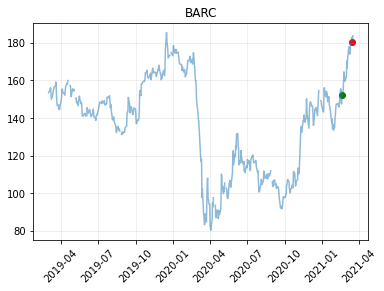

0 GME -187.1145486756
1 GME -18.934025103875
TOTAL:  GME -206.048573779475


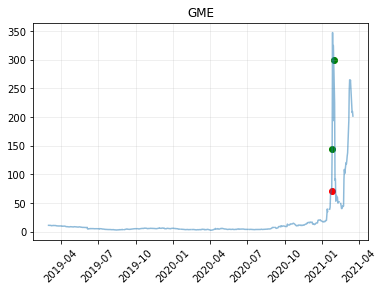

0 ECAR -7.7696659241250075
TOTAL:  ECAR -7.7696659241250075


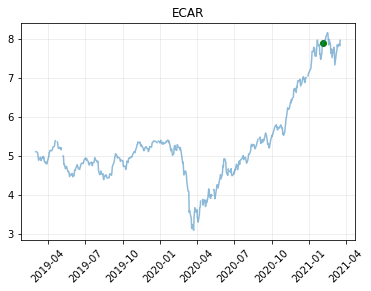

0 CNX1 -1.4323668543999872
TOTAL:  CNX1 -1.4323668543999872


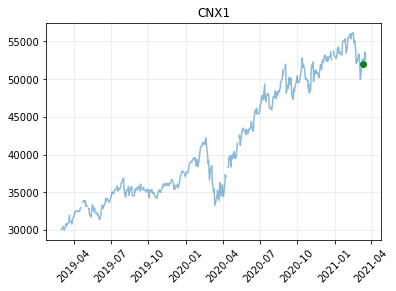

0 JDW 1.6800000000000068
1 JDW -4.75263593279999
TOTAL:  JDW -3.072635932799983


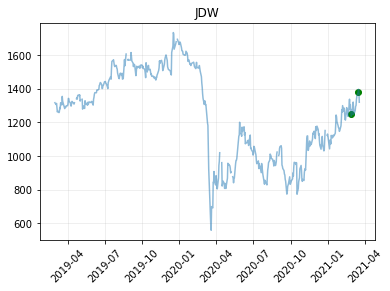

0 VUKE 14.331814680000008
1 VUKE 6.433130919999996
2 VUKE -0.3212100599999985
3 VUKE 0.32234453999999957
4 VUKE 2.4798291800000243
TOTAL:  VUKE 23.24590925999999


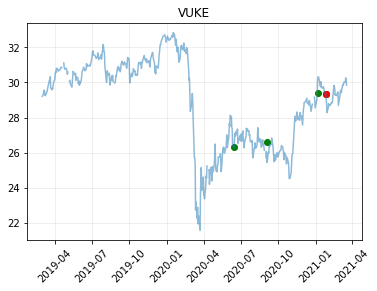

0 VAPX 34.54347131875001
1 VAPX 11.636691477500001
2 VAPX -1.5292110312500142
TOTAL:  VAPX 44.65095176500006


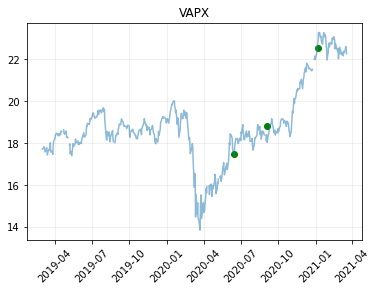

0 V -10.02319744635001
TOTAL:  V -10.02319744635001


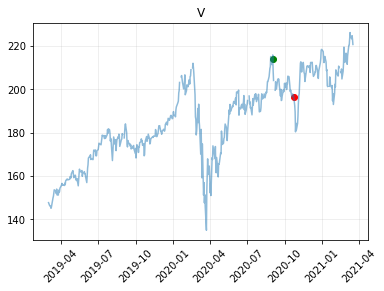

0 BB -7.996749999999999
TOTAL:  BB -7.996749999999999


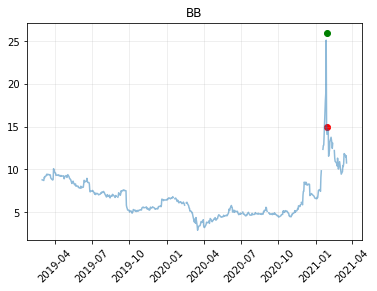

0 MA -9.39061657847499
TOTAL:  MA -9.39061657847499


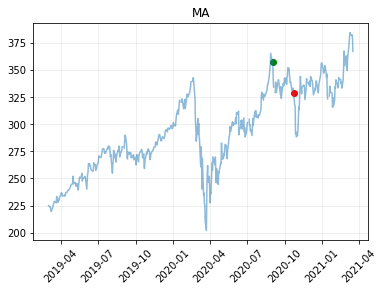

0 NAKD -3.146224427500001
TOTAL:  NAKD -3.146224427500001


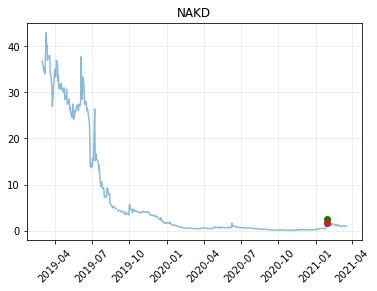

0 NOK -1.6094999999999993
TOTAL:  NOK -1.6094999999999993


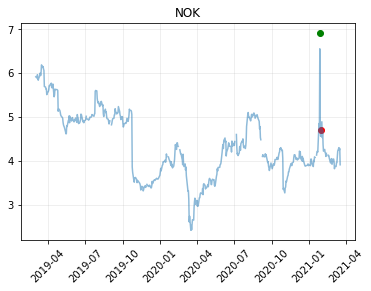

0 INRG 116.351475877
1 INRG 24.795628937500005
2 INRG 45.298737440249965
3 INRG -0.3167851342499999
4 INRG -29.828621220600013
TOTAL:  INRG 156.30043589989998


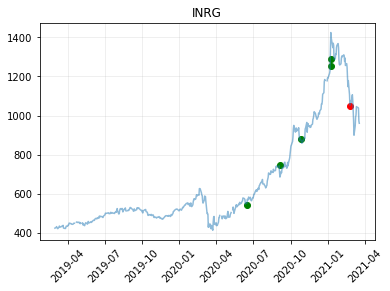

In [24]:
for ticker in wb_tickers:
    for ibuy in range(len(buys[buys['Ticker']==ticker_map[ticker]])):
        returns = get_asset_returns_since_buy(ticker_map[ticker],ibuy)
        print(ibuy, ticker_map[ticker], returns)

    returns_tot = get_asset_returns_total(ticker_map[ticker])
    print('TOTAL: ', ticker_map[ticker],returns_tot)
    
    data = web_df['Close',ticker]
    plt.plot(data.keys(),data.values,alpha=0.5)

    mask = (((history['Action']=='Market buy') | (history['Action']=='Limit buy')) & 
            (history['Ticker']==ticker_map[ticker]))
    times = history[mask]['Time'].values
    prices = history[mask]['Price / share'].values
    plt.scatter(times,prices,c='green')

    mask = (((history['Action']=='Market sell') | (history['Action']=='Limit sell')) &
            (history['Ticker']==ticker_map[ticker]))
    times = history[mask]['Time'].values
    prices = history[mask]['Price / share'].values
    plt.scatter(times,prices,c='red')

    plt.title(ticker_map[ticker])
    plt.xticks(rotation=45)
    plt.grid(alpha=0.25)
    plt.show()

In [31]:
get_portfolio_value() - (buys['Total (GBP)'].sum()-sells['Total (GBP)'].sum())

14.126759518045446

In [30]:
history[history['Action']=='Deposit']['Total (GBP)'].sum()

2177.0